In [49]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import Evaluation_Attributes as Darwin 
from Data_Operation import Trading_Data
from datetime import datetime, timedelta
# import scipy.stats
import scipy.ndimage
from Data_Operation import Comput_pipV, Market_Data
from Trader_Analytics import Trader_Analytics

# Get Test Trader Data

In [46]:
test_data =  Trading_Data(id = 147).send_post_request
test_data

,symbol,ordertype,openorder_time,openorder_price,openorder_volume,openorder_commission,closeorder_time,closeorder_price,closeorder_volume,closeorder_commission,...,balance,openTradeDetails,openClosestrategies,type,id,dfoentity_id,pip_value,volatility,drawDown,marketCorrelation
0,,None,2022-05-27T09:59:55,0.00000,0.00,0,2022-05-27T09:59:55,0.00000,0.00,0,...,0,None,None,None,11976,0,0.000000,0.0000,None,[]
1,EURCHF,Short,2022-05-27T10:59:17,1.02854,5.00,0,2022-05-27T12:02:23,1.02754,5.00,0,...,0,"[{'symbol': 'CADJPY', 'openorder_time': '2022-...","[{'id': 1, 'candlewindow': '-50% (star', 'utct...",None,11497,0,1.043210,0.9462,"[{'symbol': 'EURCHF', 'time': '2022-05-27T10:5...",[]
2,CADJPY,Long,2022-05-27T09:59:55,99.76400,5.00,0,2022-05-27T12:08:56,99.73700,5.00,0,...,0,"[{'symbol': 'CADJPY', 'openorder_time': '2022-...","[{'id': 1, 'candlewindow': '-50% (star', 'utct...",None,11496,0,0.007869,1.0971,"[{'symbol': 'CADJPY', 'time': '2022-05-27T09:5...",[]
3,AUDJPY,Long,2022-05-30T10:02:23,91.37200,5.00,0,2022-05-30T11:07:38,91.57300,5.00,0,...,0,"[{'symbol': 'AUDCAD', 'openorder_time': '2022-...","[{'id': 1, 'candlewindow': '-50% (star', 'utct...",None,11499,0,0.007852,0.9071,"[{'symbol': 'AUDJPY', 'time': '2022-05-30T10:0...",[]
4,AUDCAD,Short,2022-05-30T10:00:04,0.91081,5.00,0,2022-05-30T14:55:16,0.90980,5.00,0,...,0,"[{'symbol': 'AUDCAD', 'openorder_time': '2022-...","[{'id': 1, 'candlewindow': '-50% (star', 'utct...",None,11498,0,0.787667,0.8083,"[{'symbol': 'AUDCAD', 'time': '2022-05-30T10:0...",[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,EURJPY,Short,2022-06-16T16:20:02,138.77500,0.20,0,2022-06-16T16:20:08,144.13400,0.20,0,...,0,"[{'symbol': 'EURJPY', 'openorder_time': '2022-...","[{'id': 1, 'candlewindow': '-50% (star', 'utct...",None,11571,0,0.007531,0.6044,"[{'symbol': 'EURJPY', 'time': '2022-06-16T16:2...",[]
76,EURJPY,Long,2022-06-16T17:11:46,139.19000,2.00,0,2022-06-16T19:59:35,139.71300,2.00,0,...,0,"[{'symbol': 'EURJPY', 'openorder_time': '2022-...","[{'id': 1, 'candlewindow': '-50% (star', 'utct...",None,11572,0,0.007546,1.1480,"[{'symbol': 'EURJPY', 'time': '2022-06-16T17:1...",[]
77,EURJPY,Short,2022-06-16T20:02:19,139.70700,0.24,0,2022-06-16T20:02:38,144.13400,0.24,0,...,0,"[{'symbol': 'EURJPY', 'openorder_time': '2022-...","[{'id': 1, 'candlewindow': '-50% (star', 'utct...",None,11573,0,0.007571,1.2427,"[{'symbol': 'EURJPY', 'time': '2022-06-16T20:0...",[]
78,EURJPY,Long,2022-06-08T14:59:58,144.13400,5.00,0,2022-06-16T20:02:38,140.89000,5.00,0,...,0,"[{'symbol': 'USDCHF', 'openorder_time': '2022-...","[{'id': 1, 'candlewindow': '-50% (star', 'utct...",None,11524,0,0.007448,2.4073,"[{'symbol': 'EURJPY', 'time': '2022-06-08T14:5...",[]


In [51]:
ta = Trader_Analytics(trader_data=test_data)

In [68]:
df = ta.cumulative_return_all_per_deal#.values[-1][0]

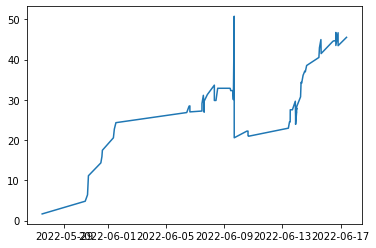

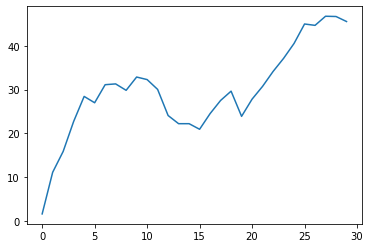

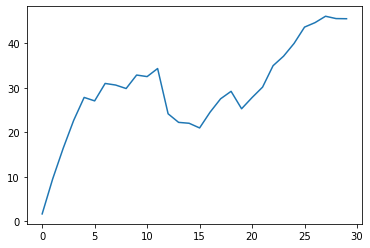

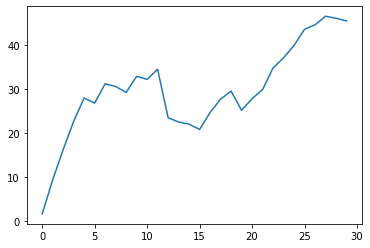

In [147]:
plt.plot( df['Cumulative Return'])
plt.show()

scale = 30/len(df['Cumulative Return'])
# Resampled by a factor of 0.2 with nearest interpolation
plt.plot(scipy.ndimage.zoom( df['Cumulative Return'], scale, order = 0))
plt.show()
# Resampled by a factor of 0.2 with bilinear interpolation:
plt.plot(scipy.ndimage.zoom( df['Cumulative Return'], scale, order = 1))
plt.show()
# Resampled by a factor of 0.2 with cubic interpolation:
plt.plot(scipy.ndimage.zoom( df['Cumulative Return'], scale, order = 3))
#****************************************************************************************

In [109]:
df['Cumulative Return']

closeorder_time
2022-05-27 12:08:56     1.66080
2022-05-30 11:07:38     4.81724
2022-05-30 14:55:16     6.41052
2022-05-30 16:25:09    11.14980
2022-05-31 12:53:30    14.33576
                         ...   
2022-06-16 16:20:08    43.51028
2022-06-16 19:59:35    46.67920
2022-06-16 20:02:38    43.46004
2022-06-16 20:02:38    43.46004
2022-06-17 09:55:41    45.53508
Name: Cumulative Return, Length: 78, dtype: float64